The United States is currently dealing with an opioid crisis. Opioid overdoses reached an all-time high this past year, and I am going to investigate one part of this crisis: who exactly (what medical profession/specialty) is prescribing these medications? And which opioids are prescribed? I downloaded this pared-down dataset from Kaggle, and it is information from only the year 2014 for 25,000 health care professionals for Medicare patients in the United States. I pared the dataset down even more (to allow for the 5 MB limit) by taking out the medications prescribed that were NOT opioids. 

This dataset is only a sample, obviously, of a much bigger, complex dataset (which would include all prescriptions for all patients, not just Medicare). 

[Here](https://www.kaggle.com/apryor6/us-opiate-prescriptions?select=prescriber-info.csv) is the pared-down dataset from Kaggle, and [here](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Part-D-Prescriber) is the original dataset from CMS.gov.


Note: opioid overdoses are not all related to prescribed medication. However, a large percentage of people addicted to opiods became that way because of a prescription. To learn more, [this book](https://www.amazon.com/Dreamland-True-Americas-Opiate-Epidemic-ebook/dp/B00U19DTS0) is slightly older but super informative. 

In [1]:
# Modules I will use
import pandas as pd
import numpy as np

# Location of dataset
path = 'prescriber-info-pared.csv'

# Read in CSV dataset of prescribers & medication prescribed
prescribers = pd.read_csv(path)
display(prescribers.head(), prescribers.tail())

,Gender,State,Credentials,Specialty,ACETAMINOPHEN.CODEINE,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,MORPHINE.SULFATE.ER,OXYCODONE.ACETAMINOPHEN,OXYCODONE.HCL,OXYCONTIN,TRAMADOL.HCL,Opioid.Prescriber
0,M,TX,DDS,Dentist,0,0,17,0,0,0,0,0,0,0,0,1
1,F,AL,MD,General Surgery,0,0,182,0,0,0,24,33,87,0,36,1
2,F,NY,M.D.,General Practice,0,0,0,0,0,0,0,0,0,0,0,0
3,M,AZ,MD,Internal Medicine,43,0,0,0,0,22,146,229,29,0,90,1
4,M,NV,M.D.,Hematology/Oncology,0,22,22,0,0,0,0,0,22,0,0,1


,Gender,State,Credentials,Specialty,ACETAMINOPHEN.CODEINE,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,MORPHINE.SULFATE.ER,OXYCODONE.ACETAMINOPHEN,OXYCODONE.HCL,OXYCONTIN,TRAMADOL.HCL,Opioid.Prescriber
24995,F,WA,M.D.,Family Practice,12,0,40,0,0,0,0,19,21,0,0,1
24996,F,MI,DO,Internal Medicine,15,0,58,0,0,0,0,0,0,0,29,1
24997,M,AZ,MD,Emergency Medicine,0,0,42,0,0,0,0,0,0,0,0,1
24998,F,IN,M.D.,Family Practice,0,0,0,0,0,0,0,0,0,0,0,1
24999,M,NY,M.D.,Dermatology,0,0,0,0,0,0,0,0,0,0,0,0


With this pared-down dataset, we can see the gender of prescriber, state, credentials, specialty, a list of the kinds of opiods prescribed, and in the final column: a 1 or 0 for whether or not this particular prescriber has prescribed an opoid medication. 

First, let's consider some details about professionals who did prescribe opioids versus those who didn't.

In [2]:
op_presc = prescribers[['Gender', 'State', 'Credentials', 'Specialty', 'Opioid.Prescriber']]
op_presc = op_presc.loc[op_presc['Opioid.Prescriber'] == 1]
total = op_presc['Opioid.Prescriber'].count()
percent_op = total / 25000
print('Total number of health care professionals who prescribed an opioid medication: ', total) 
print('Percent of health care professionals who prescribed an opioid medication: ', percent_op)
display(op_presc.head(), op_presc.tail())

Total number of health care professionals who prescribed an opioid medication:  14688
Percent of health care professionals who prescribed an opioid medication:  0.58752


,Gender,State,Credentials,Specialty,Opioid.Prescriber
0,M,TX,DDS,Dentist,1
1,F,AL,MD,General Surgery,1
3,M,AZ,MD,Internal Medicine,1
4,M,NV,M.D.,Hematology/Oncology,1
5,M,PA,DO,General Surgery,1


,Gender,State,Credentials,Specialty,Opioid.Prescriber
24994,M,NC,MD,General Surgery,1
24995,F,WA,M.D.,Family Practice,1
24996,F,MI,DO,Internal Medicine,1
24997,M,AZ,MD,Emergency Medicine,1
24998,F,IN,M.D.,Family Practice,1


In this sample dataset, out of 25,000 health care professionals who have prescribed medications, over half have prescribed at least one opioid medication. 

Next, let's look at the type of health care professionals who are prescribing opioid medications. However, we need to clean some data first because there are varying text inputs for 'Credentials.' For instance, for 'Doctor of Medicine', there are at least the following inputs: 'MD', 'M.D.', 'M D'

In [3]:
# Convert all specialty descriptions to lowercase, credential inputs to uppercase, & drop any rows that have missing values
op_presc['Specialty'] = op_presc['Specialty'].str.lower()
op_presc['Credentials'] = op_presc['Credentials'].str.upper()
op_presc.dropna(inplace=True)

# Let's see how many different inputs there are for the 'Credentials' column
cred_input = op_presc['Credentials'].unique()
print('There are ', len(cred_input), ' unique inputs in the Credentials column.')

# Let's see how many different inputs there are for the 'Specialty' column
spec_input = op_presc['Specialty'].unique()
print('There are ', len(spec_input), ' unique inputs in the Specialty column.')

display(op_presc)

There are  525  unique inputs in the Credentials column.
There are  94  unique inputs in the Specialty column.


,Gender,State,Credentials,Specialty,Opioid.Prescriber
0,M,TX,DDS,dentist,1
1,F,AL,MD,general surgery,1
3,M,AZ,MD,internal medicine,1
4,M,NV,M.D.,hematology/oncology,1
5,M,PA,DO,general surgery,1
...,...,...,...,...,...
24994,M,NC,MD,general surgery,1
24995,F,WA,M.D.,family practice,1
24996,F,MI,DO,internal medicine,1
24997,M,AZ,MD,emergency medicine,1


Now let's try to clean up some of the 'Credentials' and 'Specialty' columns so that we can narrow down the actual credentials of these professionals.

In [4]:
new_lst = []
for index, row in op_presc.iterrows():
    new_str = ''
    for character in row['Credentials']:
        if (character.isalpha()) == True:
            new_str += character
        else:
            pass
    new_lst.append(new_str)
op_presc.insert(2, 'Credentials2', new_lst)
del op_presc['Credentials']
op_presc = op_presc.rename(columns={'Credentials2': 'Credentials'})

## Standardize credentials -- I needed a workaround because 'DMD' contains 'MD', so see below
credentials_dict = {'Dentist': ['DDS', 'DMD', 'DENTIST', 'BDS', 'EIN'], 'ARNP': ['NP', 'RN', 'PN', 'NURSEPRACTIONER', 
                    'NURSEPRACTITIONER', 'NFP', 'FAMILYNURSEPRACTIT', 'NP', 'PHD', 'MNS', 'MSN', 'MS', 'MFTI', 'ANRP'], 
                    'PA': ['PA'], 'DPM': ['DPM', 'DP'], 'MD': ['MD', 'PHYSICIAN', 'JAMESKIM'], 'DO': ['DO'], 'OD': ['OD'], 
                    'ND': ['ND'], 'RPH': ['RPH', 'PHC'], 'CNS': ['CNS'], 'MBBS': ['MBBS', 'MBBCH', 'MBBCHB', 'MBCHB', 'BS'], 
                    'CNM': ['CNM']}
standardized = op_presc.copy()

for key, value in credentials_dict.items():
    values = credentials_dict[key]
    look_for = '|'.join(values)
    change_to = standardized['Credentials'].str.contains(look_for)
    standardized['Credentials'].where(-change_to, key, inplace=True)

new_standard = standardized.copy()
dent_to_dds = standardized['Credentials'].str.contains('Dentist')
new_standard['Credentials'].where(-dent_to_dds, 'DDS/DMD', inplace=True)

display(new_standard.head(), new_standard.tail())

,Gender,State,Credentials,Specialty,Opioid.Prescriber
0,M,TX,DDS/DMD,dentist,1
1,F,AL,MD,general surgery,1
3,M,AZ,MD,internal medicine,1
4,M,NV,MD,hematology/oncology,1
5,M,PA,DO,general surgery,1


,Gender,State,Credentials,Specialty,Opioid.Prescriber
24994,M,NC,MD,general surgery,1
24995,F,WA,MD,family practice,1
24996,F,MI,DO,internal medicine,1
24997,M,AZ,MD,emergency medicine,1
24998,F,IN,MD,family practice,1


In [5]:
# Let's see how many different inputs there are for the now-standardized 'Credentials' column
cred_stand = new_standard['Credentials'].unique()
print('There are ', len(cred_stand), ' unique inputs in the Credentials column.')
print(cred_stand)
print('There are ', len(credentials_dict), ' entries in the credentials dictionary.')

There are  12  unique inputs in the Credentials column.
['DDS/DMD' 'MD' 'DO' 'DPM' 'ARNP' 'PA' 'MBBS' 'OD' 'RPH' 'CNS' 'ND' 'CNM']
There are  12  entries in the credentials dictionary.


In [6]:
# Group by credentials and count how many opioids have been prescribed by those professionals
count_rx_by_cred = new_standard.groupby(['Credentials']).sum()
count_rx_by_cred.rename(columns={'Opioid.Prescriber': 'Opioid Prescriber Count'}, inplace=True)
count_rx_by_cred.sort_values(by=['Opioid Prescriber Count'], ascending=False, inplace=True)

# Make it easier to understand the credentials
cred_lst = ['Doctor of Medicine', 'Nurse Practitioner', 'Physician Assistant', 'Dentist', 'Doctor of Osteopathic Medicine',
           'Doctor of Podiatric Medicine', 'Bachelor of Medicine, Bachelor of Surgery', 'Doctor of Optometry', 
           'Clinical Nurse Specialist', 'Doctor of Naturopathic Medicine', 'Registered Pharmacist', 'Certified Nurse-Midwife']
count_rx_by_cred['Credential Description'] = cred_lst
count_rx_by_cred = count_rx_by_cred[['Credential Description', 'Opioid Prescriber Count']]
display(count_rx_by_cred)

,Credential Description,Opioid Prescriber Count
Credentials,,
MD,Doctor of Medicine,9043
ARNP,Nurse Practitioner,1420
PA,Physician Assistant,1228
DDS/DMD,Dentist,1189
DO,Doctor of Osteopathic Medicine,1149
DPM,Doctor of Podiatric Medicine,225
MBBS,"Bachelor of Medicine, Bachelor of Surgery",17
OD,Doctor of Optometry,3
CNS,Clinical Nurse Specialist,2


From this data, we can see that professionals with MD (Doctor of Medicine) credentials prescribe the most opioids, by far, in this sample data. The second most-common prescriber is ARNP (Nurse Practitioner), which in 25 of the 50 United States, Nurse Practitioners are required to have a Doctor of Medicine (or Doctor of Osteopathic Medicine). There are also varying restrictions on some of these 'Credential' categories as to whether or not that particular Credential is supposed to prescribe an opioid. 

In [7]:
# Let's add a percent column to easily see the differences 

total = count_rx_by_cred['Opioid Prescriber Count'].sum()
percent_lst = []
for index, row in count_rx_by_cred.iterrows():
    percentage = row['Opioid Prescriber Count'] / total
    percent_lst.append(percentage)
count_rx_by_cred['Percent of Total'] = percent_lst
count_rx_by_cred = count_rx_by_cred.reset_index()
display(count_rx_by_cred)

,Credentials,Credential Description,Opioid Prescriber Count,Percent of Total
0,MD,Doctor of Medicine,9043,0.633219
1,ARNP,Nurse Practitioner,1420,0.099433
2,PA,Physician Assistant,1228,0.085988
3,DDS/DMD,Dentist,1189,0.083257
4,DO,Doctor of Osteopathic Medicine,1149,0.080457
5,DPM,Doctor of Podiatric Medicine,225,0.015755
6,MBBS,"Bachelor of Medicine, Bachelor of Surgery",17,0.001190
7,OD,Doctor of Optometry,3,0.000210
8,CNS,Clinical Nurse Specialist,2,0.000140
9,ND,Doctor of Naturopathic Medicine,2,0.000140


<AxesSubplot:xlabel='Credentials', ylabel='Percent of Total'>

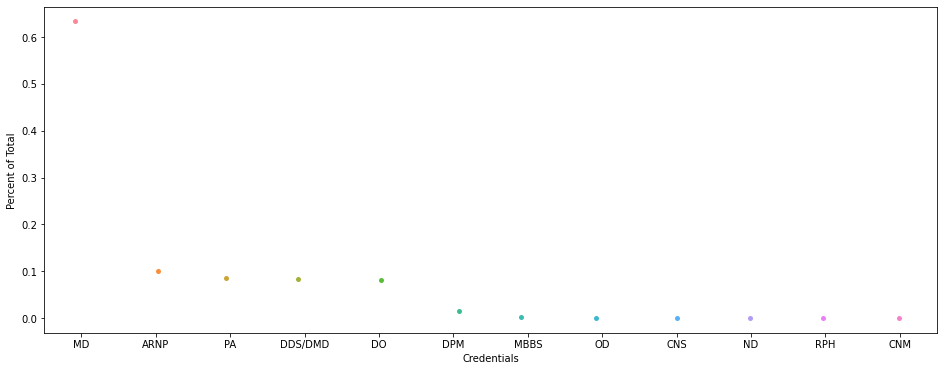

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.stripplot(x='Credentials', y='Percent of Total', data=count_rx_by_cred)

One interesting outcome of the data so far:
At this point in time, Nurse Practitioners are able to prescribe opioids, but in some states, they are unable to prescribe medication to help opioid addicts. In this sample data, Nurse Practitioners are the second most-common prescribers of opioids (part of this is surely due to the nation-wide healthcare shortage, especially in rural areas). 

Next, let's consider the original data set again. I'd like to also see which opioids are being prescribed:

In [9]:
# Pare down the original dataset to just the opioid medications prescribed
opioids = prescribers.copy()
opioids = opioids.loc[opioids['Opioid.Prescriber'] == 1]
opioids.drop(columns=['Gender', 'State', 'Credentials', 'Specialty', 'Opioid.Prescriber'], inplace=True)

# Get rid of any rows that contain all zeros
opioids = opioids.loc[~(opioids==0).all(axis=1)]

display(opioids)

,ACETAMINOPHEN.CODEINE,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,MORPHINE.SULFATE.ER,OXYCODONE.ACETAMINOPHEN,OXYCODONE.HCL,OXYCONTIN,TRAMADOL.HCL
0,0,0,17,0,0,0,0,0,0,0,0
1,0,0,182,0,0,0,24,33,87,0,36
3,43,0,0,0,0,22,146,229,29,0,90
4,0,22,22,0,0,0,0,0,22,0,0
5,0,0,0,0,0,0,0,25,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
24992,0,0,20,0,0,0,0,0,0,0,0
24994,0,0,46,0,0,0,0,23,0,0,0
24995,12,0,40,0,0,0,0,19,21,0,0
24996,15,0,58,0,0,0,0,0,0,0,29


In [10]:
# Sum along the columns to see the totals & put it in a dictionary
med_dict = {}
for medication, total in opioids.iteritems():
    med_dict[medication] = total.sum()
print(med_dict)

# Make a new dataframe from dictionary
med_df = pd.DataFrame.from_dict(med_dict, orient='index').reset_index()
med_df.rename(columns={'index': 'Opioid Medication', 0: 'Number of Prescriptions'}, inplace=True)
display(med_df)

{'ACETAMINOPHEN.CODEINE': 59260, 'FENTANYL': 85443, 'HYDROCODONE.ACETAMINOPHEN': 958082, 'HYDROMORPHONE.HCL': 23177, 'METHADONE.HCL': 35818, 'MORPHINE.SULFATE': 20738, 'MORPHINE.SULFATE.ER': 88305, 'OXYCODONE.ACETAMINOPHEN': 242914, 'OXYCODONE.HCL': 172411, 'OXYCONTIN': 49872, 'TRAMADOL.HCL': 406693}


,Opioid Medication,Number of Prescriptions
0,ACETAMINOPHEN.CODEINE,59260
1,FENTANYL,85443
2,HYDROCODONE.ACETAMINOPHEN,958082
3,HYDROMORPHONE.HCL,23177
4,METHADONE.HCL,35818
5,MORPHINE.SULFATE,20738
6,MORPHINE.SULFATE.ER,88305
7,OXYCODONE.ACETAMINOPHEN,242914
8,OXYCODONE.HCL,172411
9,OXYCONTIN,49872


In [11]:
# Let's sort values and see what the most prescribed opioid medications are:
med_df.sort_values(by='Number of Prescriptions', ascending=False, inplace=True)
display(med_df)

,Opioid Medication,Number of Prescriptions
2,HYDROCODONE.ACETAMINOPHEN,958082
10,TRAMADOL.HCL,406693
7,OXYCODONE.ACETAMINOPHEN,242914
8,OXYCODONE.HCL,172411
6,MORPHINE.SULFATE.ER,88305
1,FENTANYL,85443
0,ACETAMINOPHEN.CODEINE,59260
9,OXYCONTIN,49872
4,METHADONE.HCL,35818
3,HYDROMORPHONE.HCL,23177


Looks like Hydrocodone-Acetaminophen (brand name: Vicodin) is the most prescribed opioid from this sample dataset. 

Fun fact: one reason they mix Acetaminophen with Hydrocodone is to prevent crushing the pill small enough in order to inject it - an attempt at preventing addiction. 

In [12]:
# Let's do some percentages! Because that's fun
total_meds = med_df['Number of Prescriptions'].sum()
percent_med_lst = []
for index, row in med_df.iterrows():
    perc_meds = row['Number of Prescriptions'] / total_meds
    percent_med_lst.append(perc_meds)
med_df['Percent of Total'] = percent_med_lst

# Let's map the opioid generic name to the brand name for better recognition
brand_name = {'HYDROCODONE.ACETAMINOPHEN': 'Vicodin', 'TRAMADOL.HCL': 'Ultram', 'OXYCODONE.ACETAMINOPHEN': 'Percocet', 
             'OXYCODONE.HCL': 'OxyContin', 'MORPHINE.SULFATE.ER': 'MS Contin', 'FENTANYL': 'Duragesic', 
              'ACETAMINOPHEN.CODEINE': 'Tylenol-Codeine', 'OXYCONTIN': 'OxyContin', 'METHADONE.HCL': 'Methadose', 
             'HYDROMORPHONE.HCL': 'Dilaudid', 'MORPHINE.SULFATE': 'MS Contin'}
display(med_df)

,Opioid Medication,Number of Prescriptions,Percent of Total
2,HYDROCODONE.ACETAMINOPHEN,958082,0.447135
10,TRAMADOL.HCL,406693,0.189803
7,OXYCODONE.ACETAMINOPHEN,242914,0.113367
8,OXYCODONE.HCL,172411,0.080464
6,MORPHINE.SULFATE.ER,88305,0.041212
1,FENTANYL,85443,0.039876
0,ACETAMINOPHEN.CODEINE,59260,0.027657
9,OXYCONTIN,49872,0.023275
4,METHADONE.HCL,35818,0.016716
3,HYDROMORPHONE.HCL,23177,0.010817


Before I actually map these medications to their brand names, we can see from the brand_name dictionary that we need to combine a couple of these because they're the same medication!

In [13]:
med_df['Brand Name'] = med_df['Opioid Medication'].map(brand_name)
med_df = med_df[['Opioid Medication', 'Brand Name', 'Number of Prescriptions', 'Percent of Total']].reset_index()
del med_df['index']

# Combine the same brand names
agg_fx = {'Number of Prescriptions': 'sum', 'Percent of Total': 'sum'}
med_df = med_df.groupby(med_df['Brand Name']).aggregate(agg_fx)
med_df.sort_values('Number of Prescriptions', ascending=False, inplace=True)
med_df.reset_index(inplace=True)
display(med_df)

,Brand Name,Number of Prescriptions,Percent of Total
0,Vicodin,958082,0.447135
1,Ultram,406693,0.189803
2,Percocet,242914,0.113367
3,OxyContin,222283,0.103739
4,MS Contin,109043,0.050890
5,Duragesic,85443,0.039876
6,Tylenol-Codeine,59260,0.027657
7,Methadose,35818,0.016716
8,Dilaudid,23177,0.010817


<AxesSubplot:xlabel='Brand Name', ylabel='Number of Prescriptions'>

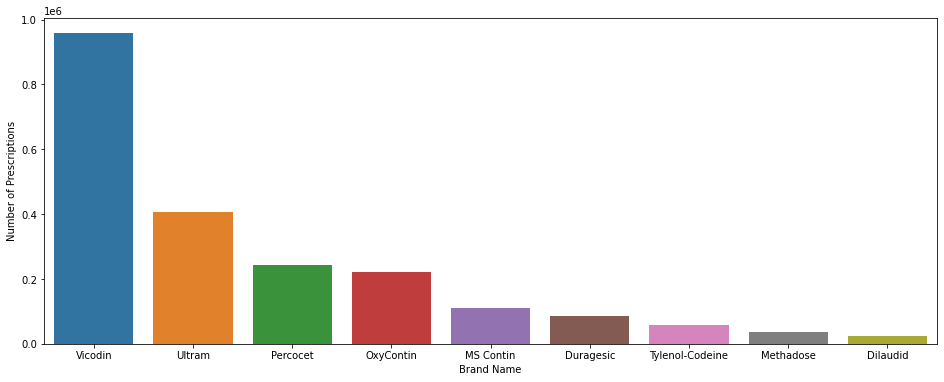

In [14]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Brand Name', y='Number of Prescriptions', data=med_df)

In conclusion, from this small dataset, I have been able to get some more information about who is prescribing opioids and which opioids are being prescribed. Analysis & implications from data like this:
1) In order to make stronger conclusions, we need a much bigger data set. It would be much more effective to get data from the entire nation, not just the Medicare patients. 

2) There are some credentials on this list that make me question their ability to actually prescribe opioids. Perhaps more oversight on prescribing opioid medications is needed to ensure that only qualified health care professionals are prescribing opioids.

3) There are still many, many opioid medications being prescribed. While there are justifiable situations and health issues that may require opioids, there may be need to be some data to support what health conditions these opioids are being prescribed for.

4) Vicodin is by far the most prescribed opioid on this list. While it is mixed with Acetominophen in order to make it more difficult to inject, is that enough to prevent addiction? Or does that just mean that someone who is addicted will move on to something else that they CAN inject? 